In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import quandl

In [3]:
start = pd.to_datetime('2012-01-01')
end = datetime.now()
stocks=[]

In [4]:
def import_data(ticker, start, end):
    df=yf.download(ticker, start, end)
    df=df['Adj Close']
    df= df.to_frame()
    stocks.append(df)
    return df

aapl = import_data('AAPL', start, end)
ibm = import_data('IBM', start, end)
amzn = import_data('AMZN', start, end)
cisco = import_data('CSCO', start, end)
google = import_data('GOOG', start, end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
def stock_df(df):
    df['Normed return'] = df['Adj Close'] / df.iloc[0]['Adj Close']
    return df

for x in stocks:
    x = stock_df(x)

In [21]:
weights = np.random.random(len(stocks))
weights /= np.sum(weights)

print(weights)

[0.17618607 0.26393512 0.01454404 0.20708115 0.33825363]


In [22]:
PTF_value = 1000000

In [23]:
for stock_df, weights in zip(stocks,weights):
    stock_df['Allocation'] = stock_df['Normed return'] * weights

In [24]:
for stock_df in stocks:
    stock_df['Position Values'] = stock_df['Allocation']*PTF_value

In [25]:
all_pos_vals = []

def stock_pos_val(df):
    all_pos_vals.append(df['Position Values'])
    return all_pos_vals

for x in stocks: 
    all_pos_vals = stock_pos_val(x)
    
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [187]:
all_pos_vals = [aapl['Position Values'], ibm['Position Values'], amzn['Position Values'], cisco['Position Values'], google['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis=1)
portfolio_val.columns = ['AAPL pos', 'IBM pos', 'AMZ pos', 'CISCO pos', 'GOOGLE pos']

In [26]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

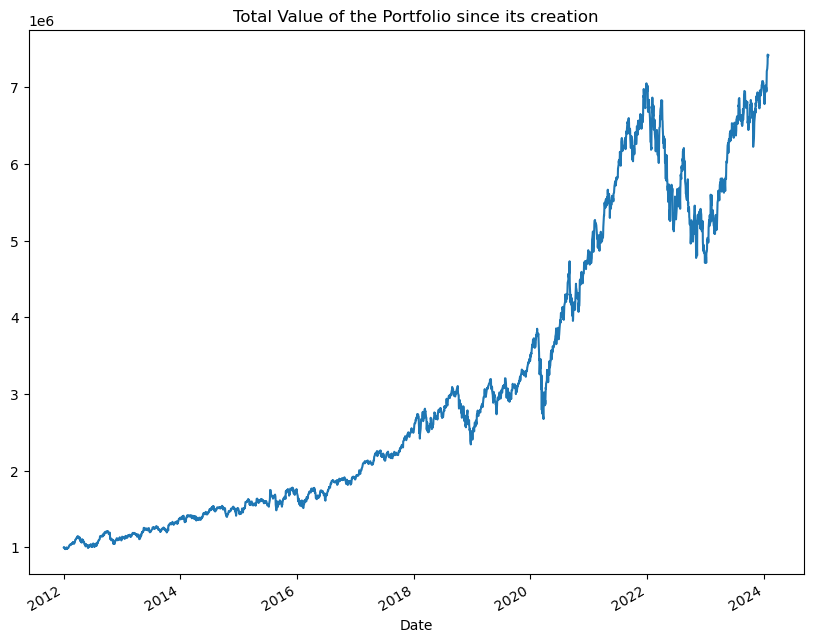

In [27]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Value of the Portfolio since its creation')
plt.show()

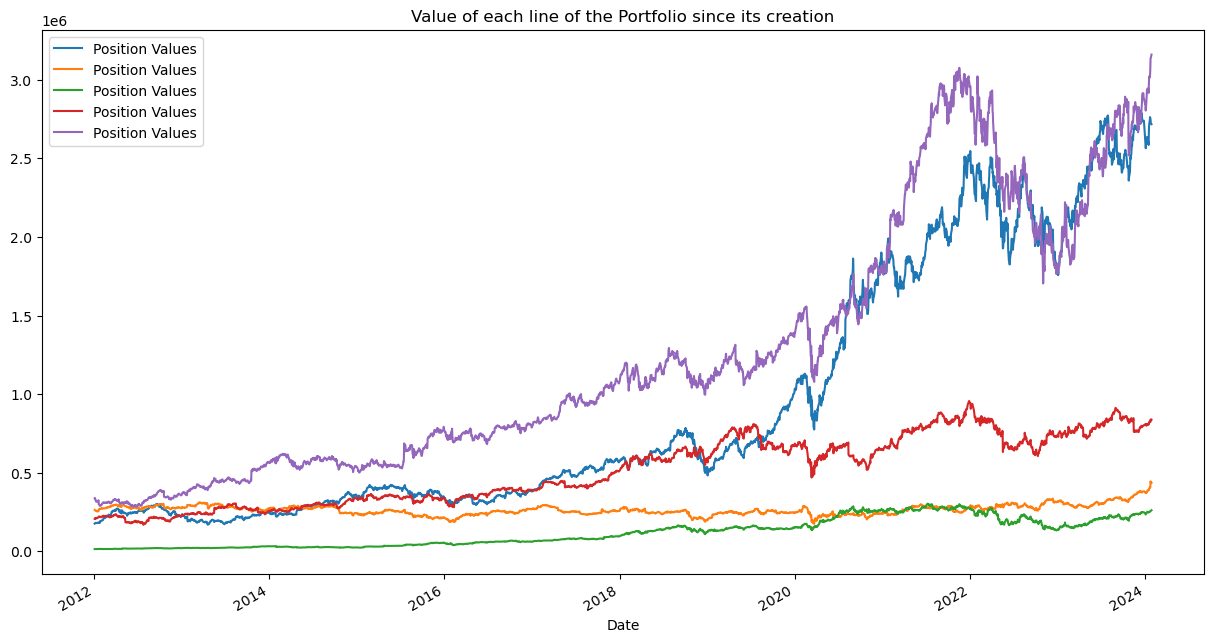

In [28]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(15,8))
plt.title('Value of each line of the Portfolio since its creation');

In [191]:
#comment choisir la répartition des actions dans le portefeuille

In [192]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change()
portfolio_val.head()

,AAPL pos,IBM pos,AMZ pos,CISCO pos,GOOGLE pos,Total Pos,Daily Return
Date,,,,,,,
2012-01-03,271165.385940,214631.446249,258237.967402,203963.587952,52001.612456,1.000000e+06,NaN
2012-01-04,272622.595527,213755.834078,256045.469964,207905.024494,52225.901048,1.002555e+06,0.002555
2012-01-05,275649.307476,212742.087939,256189.716112,207138.587649,51501.453147,1.003221e+06,0.000665
2012-01-06,278530.865538,210299.599226,263401.858467,206372.301310,50798.891292,1.009404e+06,0.006163
2012-01-09,278089.110000,209205.156516,257560.040767,207686.008137,48645.081648,1.001185e+06,-0.008142


In [193]:
portfolio_val['Daily Return'].mean()

0.0008810802530129718

In [194]:
portfolio_val['Daily Return'].std()

0.014796617245037837

<Axes: ylabel='Frequency'>

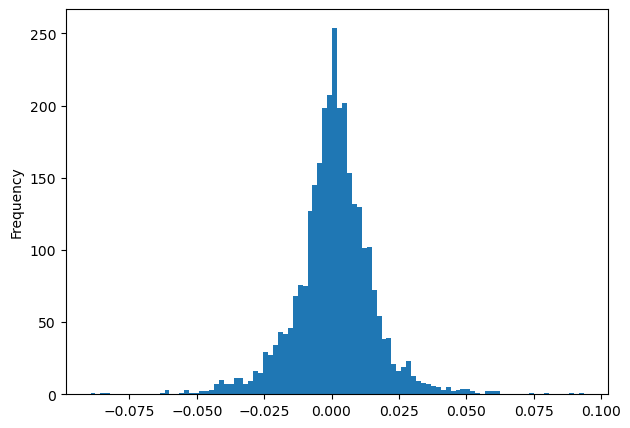

In [195]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(7,5))

<Axes: ylabel='Density'>

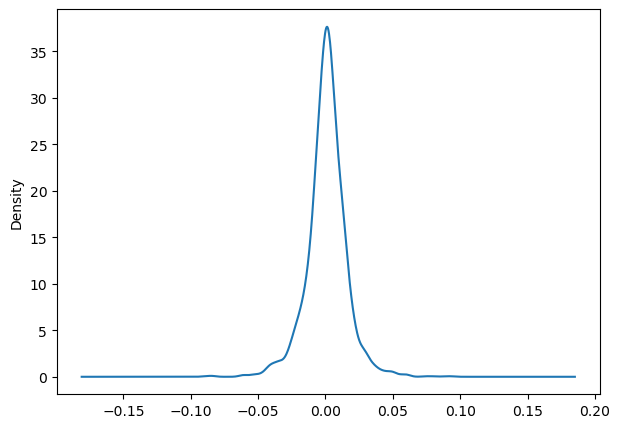

In [196]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(7,5))

In [197]:
cumulative_return = 100*(portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] -1)

In [198]:
cumulative_return

937.3950141447123

In [199]:
portfolio_val['Total Pos'][-1]

10373950.141447123

In [200]:
Rf = 4/100

In [201]:
SR = ((portfolio_val['Daily Return'].mean()) - Rf) / portfolio_val['Daily Return'].std()

In [202]:
SR

-2.643774526242197

In [203]:
ASR = (252**0.5)*SR

In [204]:
ASR

-41.96861951378676